# 1- Import Libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

# 2- Import Data

In [5]:
df_Gender = pd.read_csv('D:\\Vs Code\\Data Sets Projects\\Titanic Data set\\gender_submission.csv')
df_Gender.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
df_Gender.info()
print('---------------------------------')
df_Gender.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
---------------------------------


,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [7]:
df_Train=pd.read_csv('train.csv')
df_Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_Train.info()
print('---------------------------------')
df_Train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
---------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_Test = pd.read_csv('test.csv')
df_Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_Test.info()
print('---------------------------------')
df_Test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
---------------------------------


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# 3- Find null Data

In [11]:
null_train = df_Train.isnull().sum()
null_train

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
null_train[null_train>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

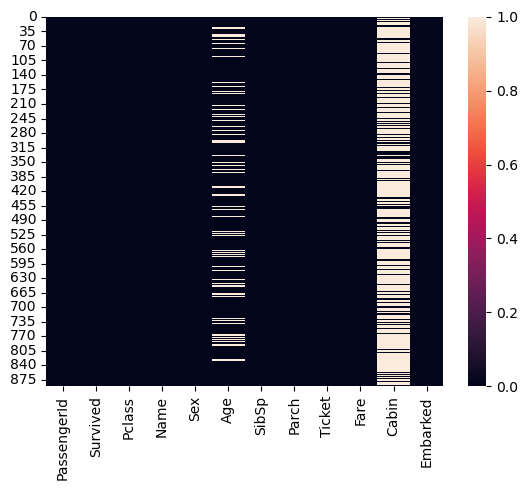

In [13]:
sns.heatmap( df_Train.isnull())

In [14]:
null_Test = df_Test.isnull().sum()
null_Test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
null_Test[null_Test>0]

Age       86
Fare       1
Cabin    327
dtype: int64

<Axes: >

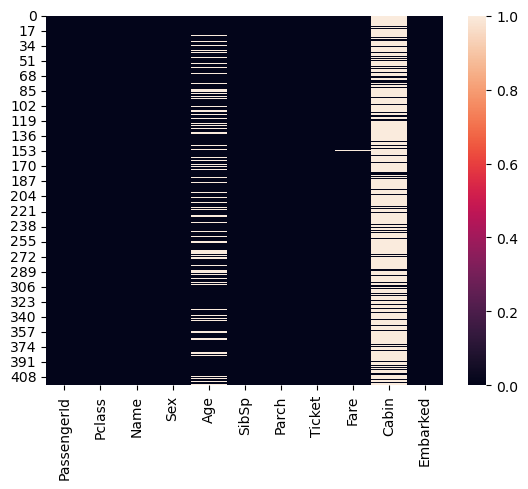

In [16]:
sns.heatmap(df_Test.isnull())

# 4- Data Cleanning

In [17]:
def Clean_Function(File):
    # Drop the 'Cabin and name' column as it is not needed / Important or string
    File.drop(['Cabin'], axis=1, inplace=True)
    
    # Fill missing values in the 'Age' column with the median Age
    median_age = File['Age'].median()
    File['Age'].fillna(median_age, inplace=True)
    
    # Drop any remaining rows with missing values
    File.dropna(inplace=True)
    
    return File

<Axes: >

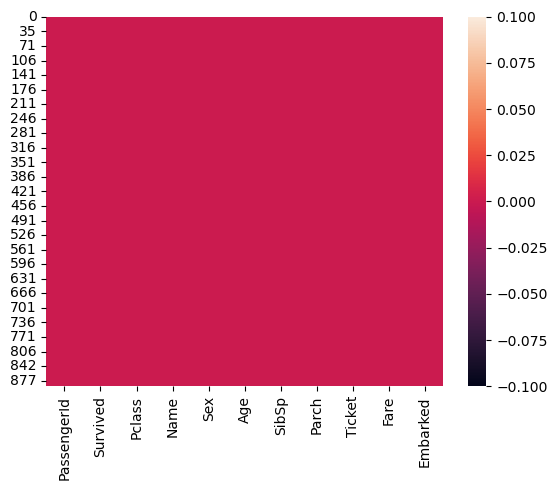

In [18]:
Clean_Function(df_Train)
sns.heatmap( df_Train.isnull())

<Axes: >

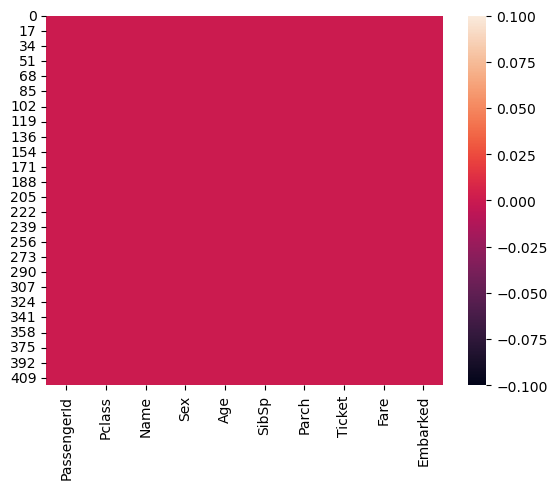

In [19]:
Clean_Function(df_Test)
sns.heatmap( df_Test.isnull())

# 5- Analysis & Visualization

In [20]:
# Select only numeric columns
numeric_df_Train = df_Train.select_dtypes(include=[float, int])
numeric_df_Test = df_Test.select_dtypes(include=[float, int])

In [21]:
def Correlation(File): 
    # Compute the correlation matrix
    Co = File.corr()
    plt.figure(figsize=(10, 8))
    # Plot the heatmap
    px.imshow(Co, text_auto= True, width= 800, height= 600, title='Correlation Matrix')

In [22]:
Correlation(numeric_df_Train)

<Figure size 1000x800 with 0 Axes>

In [23]:
Correlation(numeric_df_Test)

<Figure size 1000x800 with 0 Axes>

In [24]:
df_Train.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [25]:
df_Train.Sex.value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

<Axes: ylabel='count'>

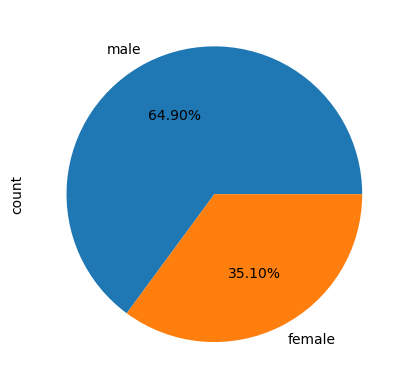

In [26]:
df_Train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='Pclass', ylabel='Survived'>

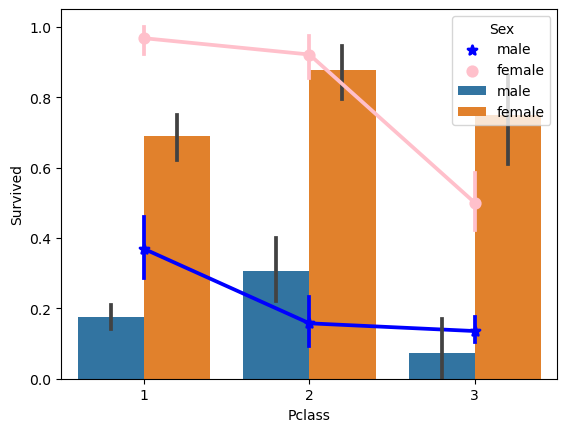

In [27]:
sns.barplot(x="Embarked",y="Survived",hue="Sex",data=df_Train)
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df_Train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"])
# sns.barplot(x="Age", y="Survived", hue="Sex", data=df_Train)


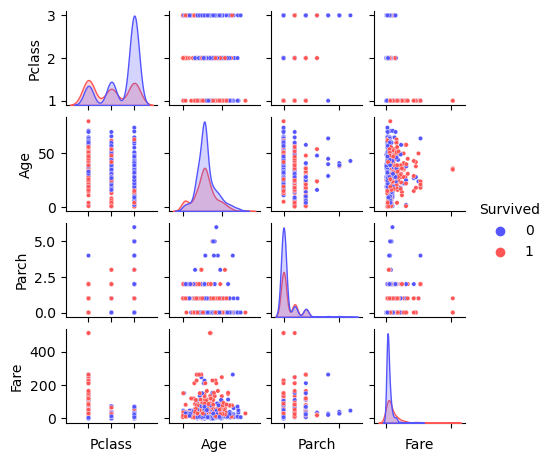

In [28]:
g = sns.pairplot(df_Train[[u'Survived',u'Pclass',u'Sex',u'Age', u'Parch', u'Fare', u'Embarked']], hue='Survived', palette = 'seismic', size=1.2,
                diag_kind='kde', diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

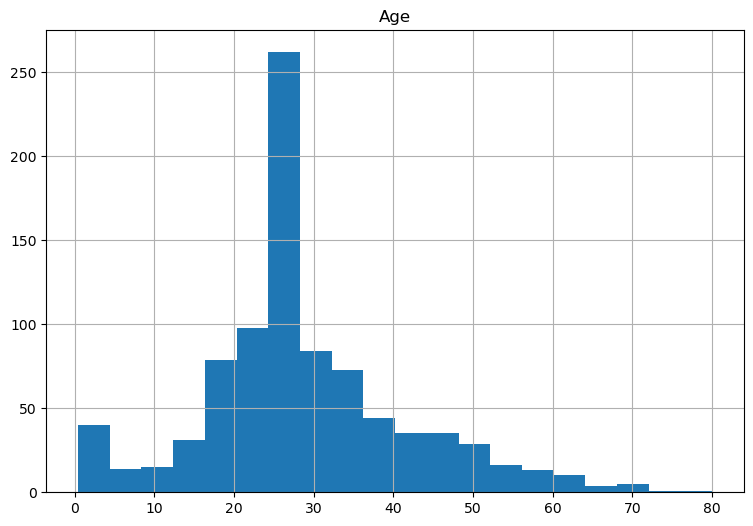

In [29]:
df_Train.hist(column="Age",figsize=(9,6),bins=20)


<Axes: xlabel='Survived', ylabel='Fare'>

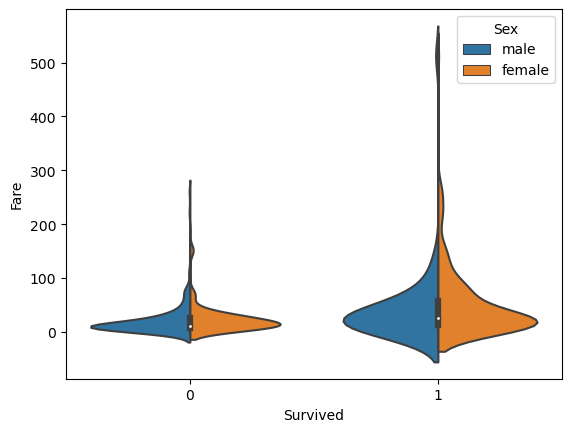

In [30]:
sns.violinplot(x='Survived', y='Fare', data=df_Train, hue='Sex', split=True)

<Axes: xlabel='Age', ylabel='Density'>

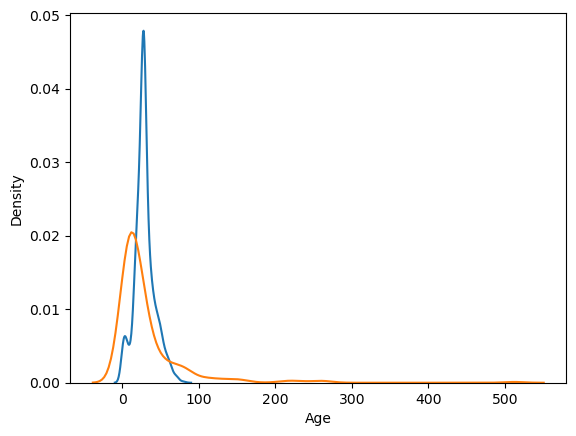

In [31]:
sns.kdeplot(x='Age', data=df_Train)
sns.kdeplot(x="Fare", data=df_Train)

In [32]:
# 1. Distribution of Passenger Ages
fig_age = px.histogram(df_Train, x='Age', nbins=30, title='Distribution of Passenger Ages', marginal="box")
fig_age.update_layout(xaxis_title='Age', yaxis_title='Frequency')
fig_age.show()

In [33]:
# 2. Distribution of Fares
fig_fare = px.histogram(df_Train, x='Fare', nbins=30, title='Distribution of Passenger Fares', marginal="box")
fig_fare.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig_fare.show()

In [34]:
# 3. Survival Rates by Class
fig_class = px.histogram(df_Train, x='Pclass', color='Survived', barmode='group', title='Survival Rates by Passenger Class')
fig_class.update_layout(xaxis_title='Passenger Class', yaxis_title='Count')
fig_class.show()

In [35]:
# 4. Survival Rates by Gender
fig_gender = px.histogram(df_Train, x='Sex', color='Survived', barmode='group', title='Survival Rates by Gender')
fig_gender.update_layout(xaxis_title='Gender', yaxis_title='Count')
fig_gender.show()

In [36]:
# 5. Correlation Heatmap
corr_matrix = numeric_df_Train.corr()
fig_corr = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns, colorscale='Viridis'))
fig_corr.update_layout(title='Correlation Heatmap of Features')
fig_corr.show()

In [37]:
# 6. Pairplot (using Plotly's scatter_matrix)
df_numeric = df_Train[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].dropna()
fig_pairplot = go.Figure(data=go.Splom(
    dimensions=[{'label': col, 'values': df_numeric[col]} for col in df_numeric.columns if col != 'Survived'],
    showupperhalf=False,
    text=df_numeric['Survived'],
    marker=dict(color=df_numeric['Survived'], colorscale='Viridis', size=5, showscale=False),
))
fig_pairplot.update_layout(title='Scatter Matrix of Selected Features', dragmode='select')
fig_pairplot.show()


In [38]:
# 7. Histograms of Continuous Variables
fig_hist = px.histogram(df_Train, x='Age', title='Age Distribution', marginal='rug')
fig_hist.show()

In [39]:
df = df_Train
app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1("Titanic Dataset Dashboard",style={'textAlign': 'center', 'color': '#4CAF50'}),
    
    dcc.Tabs([
        dcc.Tab(label='Survival Rates', children=[
            html.Div([
                html.Label("Select Feature:"),
                dcc.Dropdown(
                    id='feature-dropdown',
                    options=[{'label': 'Pclass', 'value': 'Pclass'},
                             {'label': 'Sex', 'value': 'Sex'},
                             {'label': 'Age', 'value': 'Age'}],
                    value='Pclass'
                ),
                dcc.Graph(id='survival-graph')
            ])
        ]),
        
        dcc.Tab(label='Distribution Plots', children=[
            html.Div([
                html.Label("Select Feature:"),
                dcc.Dropdown(
                    id='dist-feature-dropdown',
                    options=[{'label': 'Age', 'value': 'Age'},
                             {'label': 'Fare', 'value': 'Fare'}],
                    value='Age'
                ),
                dcc.Graph(id='dist-graph')
            ])
        ]),
        
        dcc.Tab(label='Correlation Heatmap', children=[
            dcc.Graph(id='heatmap-graph')
        ])
    ])
])

# Callback 
@app.callback(
    Output('survival-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_survival_graph(selected_feature):
    if selected_feature == 'Age':
        df_selected = df[['Survived', selected_feature]].dropna()
        fig = px.histogram(df_selected, x=selected_feature, color='Survived',
                           title=f'Survival by {selected_feature}')
    else:
        fig = px.histogram(df, x=selected_feature, color='Survived',
                           barmode='group', title=f'Survival by {selected_feature}')
    return fig

# Callback for Distribution 
@app.callback(
    Output('dist-graph', 'figure'),
    Input('dist-feature-dropdown', 'value')
)
def update_dist_graph(selected_feature):
    fig = px.histogram(df, x=selected_feature, nbins=30, title=f'Distribution of {selected_feature}')
    return fig

# Callback for Correlation 
@app.callback(
    Output('heatmap-graph', 'figure'),
    Input('heatmap-graph', 'id')
)
def update_heatmap(_):
    df_numeric = df.select_dtypes(include='number')
    corr_matrix = df_numeric.corr()
    fig = px.imshow(corr_matrix, text_auto=True, aspect='auto', title='Correlation Heatmap')
    return fig

# Run 
if __name__ == '__main__':
    app.run_server(debug=True)


In [40]:
df = df_Train
numeric_df = df.select_dtypes(include='number').dropna()

app = dash.Dash(__name__)

app.layout = html.Div(style={'backgroundColor': '#f9f9f9'}, children=[
    html.H1("Titanic Dataset Dashboard", style={'textAlign': 'center', 'color': '#4CAF50'}),
    
    dcc.Tabs([
        dcc.Tab(label='Age Distribution', children=[
            dcc.Graph(
                id='age-distribution',
                figure=px.histogram(df, x='Age', nbins=30, title='Distribution of Passenger Ages')
            )
        ], style={'backgroundColor': '#e3f2fd'}),
        
        dcc.Tab(label='Fare Distribution', children=[
            dcc.Graph(
                id='fare-distribution',
                figure=px.histogram(df, x='Fare', nbins=30, title='Distribution of Passenger Fares')
            )
        ], style={'backgroundColor': '#e8f5e9'}),
        
        dcc.Tab(label='Survival by Class', children=[
            dcc.Graph(
                id='survival-by-class',
                figure=px.histogram(df, x='Pclass', color='Survived', barmode='group', title='Survival Rates by Passenger Class')
            )
        ], style={'backgroundColor': '#fff3e0'}),
        
        dcc.Tab(label='Survival by Gender', children=[
            dcc.Graph(
                id='survival-by-gender',
                figure=px.histogram(df, x='Sex', color='Survived', barmode='group', title='Survival Rates by Gender')
            )
        ], style={'backgroundColor': '#fce4ec'}),
        
        dcc.Tab(label='Correlation Heatmap', children=[
            dcc.Graph(
                id='correlation-heatmap',
                figure=px.imshow(numeric_df.corr(), text_auto=True, aspect='auto', title='Correlation Heatmap')
            )
        ], style={'backgroundColor': '#e8eaf6'}),
        
        dcc.Tab(label='Scatter Matrix', children=[
            dcc.Graph(
                id='scatter-matrix',
                figure=go.Figure(data=go.Splom(
                    dimensions=[{'label': col, 'values': numeric_df[col]} for col in numeric_df.columns if col != 'Survived'],
                    showupperhalf=False,
                    text=numeric_df['Survived'],
                    marker=dict(color=numeric_df['Survived'], colorscale='Viridis', size=5, showscale=False)
                )).update_layout(title='Scatter Matrix of Selected Features', dragmode='select')
            )
        ], style={'backgroundColor': '#f3e5f5'}),
    ], style={'fontFamily': 'Arial', 'fontSize': '16px'})
])

# Run 
if __name__ == '__main__':
    app.run_server(debug=True)


In [41]:
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the Titanic dataset
df = pd.read_csv('D:\\Vs Code\\Data Sets Projects\\Titanic Data set\\train.csv')

# Prepare data for figures
numeric_df = df.select_dtypes(include='number').dropna()

# Set up the Streamlit app layout
st.title("Titanic Dataset Dashboard")

# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.selectbox("Choose a page", ["Age Distribution", "Fare Distribution", "Survival by Class", "Survival by Gender", "Correlation Heatmap", "Scatter Matrix"])

# Age Distribution
if page == "Age Distribution":
    st.header("Distribution of Passenger Ages")
    fig = px.histogram(df, x='Age', nbins=30, title='Distribution of Passenger Ages')
    st.plotly_chart(fig)

# Fare Distribution
elif page == "Fare Distribution":
    st.header("Distribution of Passenger Fares")
    fig = px.histogram(df, x='Fare', nbins=30, title='Distribution of Passenger Fares')
    st.plotly_chart(fig)

# Survival by Class
elif page == "Survival by Class":
    st.header("Survival Rates by Passenger Class")
    fig = px.histogram(df, x='Pclass', color='Survived', barmode='group', title='Survival Rates by Passenger Class')
    st.plotly_chart(fig)

# Survival by Gender
elif page == "Survival by Gender":
    st.header("Survival Rates by Gender")
    fig = px.histogram(df, x='Sex', color='Survived', barmode='group', title='Survival Rates by Gender')
    st.plotly_chart(fig)

# Correlation Heatmap
elif page == "Correlation Heatmap":
    st.header("Correlation Heatmap")
    corr_matrix = numeric_df.corr()
    fig = px.imshow(corr_matrix, text_auto=True, aspect='auto', title='Correlation Heatmap')
    st.plotly_chart(fig)

# Scatter Matrix
elif page == "Scatter Matrix":
    st.header("Scatter Matrix of Selected Features")
    fig = go.Figure(data=go.Splom(
        dimensions=[{'label': col, 'values': numeric_df[col]} for col in numeric_df.columns if col != 'Survived'],
        showupperhalf=False,
        text=numeric_df['Survived'],
        marker=dict(color=numeric_df['Survived'], colorscale='Viridis', size=5, showscale=False)
    ))
    fig.update_layout(title='Scatter Matrix of Selected Features', dragmode='select')
    st.plotly_chart(fig)


2024-08-27 18:43:50.646 
  command:

    streamlit run d:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
